# 3.3 ADTs Homework
Rhitt C.

## Question 1A - Queues for Limited Resources

Briefly explain why a queue is an appropriate ADT for modelling the accessing of limited resources.

### Response
Say there are limited resources, e.g. rations in war, that must be distributed to people gradually in succession. In the simplest case, the most natural criterion for determining who should be offered resources first is how long they have been waiting. That is, the first person in line should be the first person to get rations (FIFO). This is naturally modelled with the standard Queue ADT.

## Question 1B - Standard Queue Signatures

Give examples of **three** main standard queue operations as signatures, and show how each would be used for modelling a real world problem.

### Response 1

### Response 2

### Response 3

## Question 2A - Ranking in Queues
Briefly explain what kind of ADT supports ranking items in a queue.

### Response

In more complex scenarios, there may be many more important criteria for determining what/who should be dequeued first. It is very difficult to implement a ranking system based on such criteria that do not correlate to the order of enqueuing. As such, a queue with this functionality is classed as a completely separate ADT called a **Priority Queue**.

## Question 2B - Priority Queue Example Problems

Give **two** different examples of using the ADT you have identified for this task. Describe in detail how it would be used to model the real world information.

### Response 1 (Basic Discussion) - Ticket Management

My inspiration behind this problem was the Job Scheduling Greedy Algorithm in the book *Algorithms Illuminated* by Tim Roughgarden I found to be quite intriguing, though the book did not mention priority queue implementation for that algorithm.

Many greedy algorithms naturally call for priority queues, especially when applied to real-world systems that must be efficient even if users input more data in the midst of execution (simply keeping an array and repeatedly sorting it is inefficient). As greedy algorithms, true to the moniker, first greedily attack the objects that best satisfy certain numerical criteria, it follows that the ADT designed to dynamically rank those objects according to some criteria and serve the best objects on a silver platter is well-suited.

#### Problem
We work in the ITS department of a large company called Chakravarty Co. Recently, the company has been under several cyberattacks from foreign agents looking for sensitive information. The executives have conducted analyses on the performance of the cybersecurity teams and have found that majority of their time is wasted on resolving relatively low risk yet lengthy issues. 

We have been tasked with designing a cybersecurity ticket management system that, upon request from a team, assigns them the most optimal ticket based on estimated risk $r\in\mathbb{R}^+$, extent of affected systems $e\in\mathbb{R}^+$ and time to complete $t\in\mathbb{R}^+$. The metric for the optimal ranking of $n\in\mathbb{N}$ tickets assigned to a certain team is how small the sum $\sum_{i=1}^n r_i e_i C_i$ would be, where $C_i\in\mathbb{R}^+$ is the time elapsed between the completion of ticket $i$ and the assignment of ticket $1$. Note that as $C$ is the only variable dependent on order of ticket completion, this metric is effectively equivalent to the average of $C$ weighted by $r$ and $e$.

#### High Level Solution

As the focus of this task is on the use of Priority Queues, I will not overly dwell on the thought process behind the greedy algorithm solution and the proof of correctness. Having said that, it is very interesting and I would like to expound upon this superficial discussion at length for a future homework task dedicated to the greedy algorithm design paradigm.

Evidently, if greater numerical values are considered higher priority, the priority rank given by $p: (\mathbb{R}^+)^3 \rightarrow \mathbb{R}, p(r, e, t)$ must be greater when $r$ or $e$ is increased, as there is a greater weightage. When time is increased, $C$ of subsequent tickets are also increased, negatively affecting the optimality metric in the long run. Therefore, as $t$ is increased, $p(r, e, t)$ must be lower. That is,
\begin{gather*}
\frac{\partial p}{\partial r}\in\mathbb{R}^+\quad\forall r\\
\frac{\partial p}{\partial e}\in\mathbb{R}^+\quad\forall e\\
\frac{\partial p}{\partial t}\in\mathbb{R}^-\quad\forall t\\
\end{gather*}

An infinite number of functions satisfy these conditions. However, it can be shown that $p(r, e, t) = \frac{re}{t}$ is the simplest one that is guaranteed to yield the best optimality metric in the general case.

#### Link to Priority Queue ADT

Now that we have a priority ranking function, the rest is easy. All the tickets are stored in a maximum priority queue object, with the rank given by $p(r,e,t)$. 

Whenever a vulnerability or security issue is found, a ticket is logged by enqueuing onto this priority queue, and the ADT sorts itself within $O(\log{n}) time, depending on the specific implementation. This complexity is not possible from regular sorting functions, as there are no innate properties of the data that can be further exploited to obtain something better than $O(n\log{n})$. 

When a cybersecurity team is ready to resolve tickets, they simply dequeue the priority queue and try to complete the task within the estimated timeframe $t$.

### Response 2 (Main Discussion) - Exam Results

#### Background - can be skipped without loss of continuity

We live in the intellectual utopia of Dijkstrasia, home to IIT (Irodov Institute of Technology), the world's top university for Mathematics, Physics and Computer Science. IIT has a very rigorous entrance examination process that is intended to only accept the brightest of minds. 

$10$ years ago, in the city of Trantor, several high schools formed a coalition known as the Teal League. These schools then jointly developed the exclusive "IIT-topper" course, where enrolled students are prepared extensively for the exam, with an average workload of $14$ hours a day. As a result, the Trantor League schools account for over $60\%$ of IIT admissions, despite only making up $0.1\%$ of applicants.

For the past few years, parents have been migrating to Trantor en mass in hopes of sending their children to Teal Leagues and clearing a path to IIT. As a result, there is currently a severe underrepresentation of working class citizens in all other parts of Dijkstrasia. The country is unable to support its large retired demographic, and is projected to collapse within the next $50$ years. The only way for Dijkstrasia to evade its imminent downfall is to disincentivise migration to Trantor immediately.

Due to the great lobbyist power of the Teal League, the parliament is unable to pose restrictions on their "IIT-topper" course. So, upon great deliberation, Dijkstrasia has decided to attack the IIT examination process instead. We have been assigned the task of designing a new student ranking system that guarantees that admissions are spread across the different regions of Dijkstrasia, and not just awarded on the basis of exam scores alone. Additionally, the implementation should be able to output the rankings of students in each exam centre for each exam round (more on this below)<br><br>


<p align="center">
  <img src="yamiyugi.jpeg"><br>
  <i>The most popular card game of Dijkstrasia is Yu-Gi-Oh!</i>
</p>

#### Description and Constraints of Problem
Problem: Design ranking system to admit student entry based on exam scores and area of residence, then report student scores and rankings in each centre


There are 3 exam rounds in this order

- Prelims
    - Taken in centres dispersed across country, each with capacity of $1000$ students
- Mains
    - One centre per region - each with unlimited capacity
- Advanced
    - One centre per state - unlimited capacity

Must rank high in one round to proceed to next

Exam scores reported to system in batches of exam centre, though specific order of reported scores in a batch is random

#### Modelling with Maximum Priority Queues

The problem can be solved by only permitting the top few scorers of each batch into the next round. Because batches are taken from centres, this ensures a more equal spread of candidates.


The rankings of each batch can be modelled using priority queues. 

1. As papers are reported, the names of students are inputted into these queues with priority correlating to the scores (potentially adjusted according to special considerations). With a regular binary heap implementation of priority queues, this takes $n\cdot O(\log{n}) = O(n\log{n})$ time, where $n$ is the number of students in the batch. With a fibonacci heap, this can be reduced to an amortised complexity of $O(n)$.

2. Once all scores of a batch have been recorded, top rankers are then dequeued and their names and scores are reported to the respective centres for publication.

3. The system indicates that all subsequent names and scores are of unfortunate failures. They are reported in a similar manner. In any implementation, both accessing the front and dequeuing take $O(\log{n})$ time, so steps $2$ and $3$ together take a total of $O(n\log{n})$ time.

4. Once all the batches of a round have been processed, the next round begins, following identical steps. Once Advanced has been processed, the final rankings of the toppers are published nation-wide.


The effective time complexity of the algorithm taken by the system is therefore $O(n\log{n})$.

#### Binary Heap Implementation - can be skipped without loss of continuity

As an academic exercise to fully conceptualise the topic, I will be implementing the Priority Queue ADT manually as a Binary Heap.

At its core, the Binary Heap implementation of Priority Queues is a sequence of data nodes that are periodically sorted according to associated priority rankings. However, regular comparison-based sorting algorithms take $O(n\log{n})$ time. So to insert and sort $n$ nodes repeatedly, it would take the absurd time complexity of $O(n^2\log{n})$. To reduce this to $O(\log{n})$ insertion $\implies O(n\log{n})$ repeated insertion, Binary Heaps use slightly counter-intuitive techniques.

It is ultimately a dynamic array of pointer references stored contiguously in memory that expands as more data is inserted. The pointers point to a priority ranking and data stored randomly in memory.

Comparison operations between priority ranks must be transitive. In this case, the priority is the exam scores. Duplicate priorities are supported. In terms of data, I am only considering student names, however this can be easily extended to include more details such as student number, school, postal address, etc. as required by the problem.

The defining characteristic of heaps is that the dynamic array is not sorted in descending(ascending) order of priority as one would expect. Instead, each index points to the node at a certain position of a Binary Tree, sorted such that every node's priority rank is larger(smaller) than that of both its children.

Here is an example:

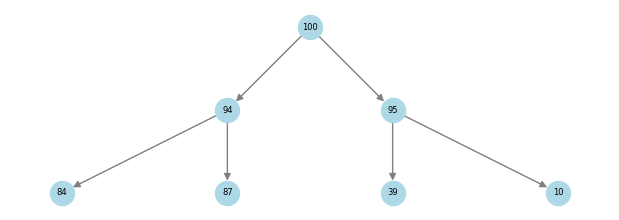

In [1]:
import user_library.rhitt_networkx as rhitt

# random score distribution
nodes = [100, 94, 95, 84, 87, 39, 10]

edges = [(100, 94), (100, 95), 
         (94, 84), (94, 87), 
         (95, 39), (95, 10)]

levels = {100: 0,
          94: 1, 95: 1,
          84: 2, 87: 2,
          39: 2, 10: 2}

# make graph
G = rhitt.nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
    
rhitt.show(G, levels, 2)

It is stored contiguously in memory as follows:

| INDEX IN MEMORY   | 0     | 1     | 2     | 3     | 4     | 5     | 6     |
| ----------------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| KEY POINTED TO    | 100   | 94    | 95    | 84    | 87    | 39    | 10    |
| PARENT            | Root  | 100   | 100   | 94    | 94    | 95    | 95    |

Provided VCE signature:

\begin{align*}
&\textbf{name } pQueue;\\
&\textbf{import } element, boolean, rank;\\
&\textbf{operations}\\
&|\quad minPQueue ∶ &\quad&\rightarrow pQueue;\\
&|\quad maxPQueue ∶ &\quad&\rightarrow pQueue; \\
&|\quad enqueue ∶ &pQueue \times element \times rank &\rightarrow pQueue; \\
&|\quad front ∶ &pQueue &\rightarrow element;\\
&|\quad dequeue ∶ &pQueue &\rightarrow pQueue; \\
&|\quad isEmpty ∶ &pQueue &\rightarrow boolean; 
\end{align*}

$$\downarrow$$

Slight modifications for ease of implementation:

\begin{align*}
&\textbf{name } pQueue;\\
&\textbf{import } element, boolean, integer;\\
&\textbf{operations}\\
&|\quad PQueue ∶ &boolean&\rightarrow pQueue;\\
&|\quad enqueue ∶ &pQueue \times integer \times element &\rightarrow pQueue; \\
&|\quad dequeue ∶ &pQueue &\rightarrow pQueue; \\
&|\quad front ∶ &pQueue &\rightarrow element;\\
&|\quad isEmpty ∶ &pQueue &\rightarrow boolean; 
\end{align*}

In [ ]:
# I put this code into ../user_library/rhitt_pQueue.py

class pQueue:
    # pQueue constructor (operation)
    def __init__(self, min_heap=True):
        self.heap = []      # python lists [], despite the name, are dynamic arrays of pointers to data
                                # and not traditional linked lists
        self.min_heap = min_heap
        self.size = 0

    # helper functions
    def parent(self, i):
        return (i - 1) // 2
    
    def children(self, i):
        return (2*i + 1, 2*i + 2)

    def swap(self, i, j):
        temp = self.heap[i]
        self.heap[i] = self.heap[j]
        self.heap[j] = temp

    def compare(self, i, j):
        # out of bounds check
        if i < self.size:
            a = self.heap[i][0]
        else:
            return False
        if j < self.size:
            b = self.heap[j][0]
        else:
            return True

        return a <= b if self.min_heap else a >= b
    

    # standard operations
    def enqueue(self, priority, data):
        # store them together
        node = (priority, data)
        self.heap.append(node)
        self.size += 1

        # restore the heap property
        i = self.size - 1      # index of current node - start at end
        while i > 0:
            parent = self.parent(i)
            if self.compare(parent, i):
                break   # heap property is satisfied
            else:
                self.swap(i, parent)
            i = parent
        
        return self
        
    def dequeue(self):
        if self.isEmpty():
            return None     # nothing to dequeue
        
        # replace root with last dangling leaf node (no strings attached)
        self.heap[0] = self.heap[self.size-1]
        self.heap[self.size-1] = None
        self.size -= 1

        # restore heap property by iteratively swapping out violations
        i = 0   # index of current node - start at root
        while True:
            left, right = self.children(i)
            if left >= self.size:   # reached end, so finished
                break

            violation = i   # value of i is sentinel indicating NO violation
            if self.compare(left, i):
                violation = left
            if right < self.size and self.compare(right, violation):
                violation = right

            if violation == i:      # no violation
                break
            else:                   # resolve violation
                self.swap(i, violation)
                i = violation

        return self
    
    def front(self):
        if self.isEmpty():
            return None
        return self.heap[0]
    
    def isEmpty(self):
        return self.size == 0

In [34]:
import user_library.rhitt_pQueue as rhitt

# test pQueue

nodes = {100 : "Daniel", 39 : "Tam", 95 : "Sai", 84 : "Tim", 94 : "Edward", 87 : "Tom", 10 : "Rhitt"}
q = rhitt.pQueue(min_heap=False)
for n in nodes:
    print((n, nodes[n]))
    print("\t->", q.heap)
    
    q.enqueue(n, nodes[n])
    print("\t=>", q.heap)

print('\n' + '-'*113 + '\n')

while not q.isEmpty():
    print(q.front())
    q.dequeue()
    print("\t<-", q.heap)

(100, 'Daniel')
	-> []
	=> [(100, 'Daniel')]
(39, 'Tam')
	-> [(100, 'Daniel')]
	=> [(100, 'Daniel'), (39, 'Tam')]
(95, 'Sai')
	-> [(100, 'Daniel'), (39, 'Tam')]
	=> [(100, 'Daniel'), (39, 'Tam'), (95, 'Sai')]
(84, 'Tim')
	-> [(100, 'Daniel'), (39, 'Tam'), (95, 'Sai')]
	=> [(100, 'Daniel'), (84, 'Tim'), (95, 'Sai'), (39, 'Tam')]
(94, 'Edward')
	-> [(100, 'Daniel'), (84, 'Tim'), (95, 'Sai'), (39, 'Tam')]
	=> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim')]
(87, 'Tom')
	-> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim')]
	=> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim'), (87, 'Tom')]
(10, 'Rhitt')
	-> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim'), (87, 'Tom')]
	=> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim'), (87, 'Tom'), (10, 'Rhitt')]

-----------------------------------------------------------------------------------------------------------------

(100, 'Daniel

## Question 3 - Python Solution to 2B Example Problem 2